In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
elo = pd.read_csv('train.csv')
elo1 = pd.read_csv('test.csv')
elo_hist_trans= pd.read_csv('historical_transactions.csv')
elo_merchant= pd.read_csv('merchants.csv')
elo_new_merchant = pd.read_csv('new_merchant_transactions.csv')

In [3]:
elo.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
elo1.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


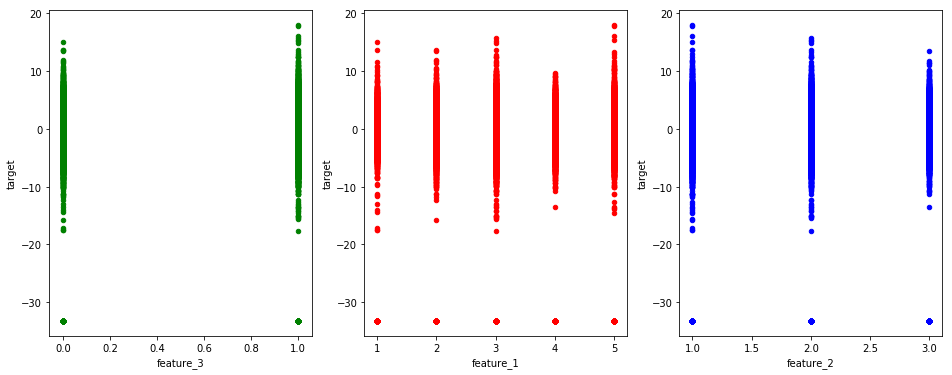

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
elo.plot(kind='scatter',x='feature_3',ax=ax[0],y='target',color='green')
elo.plot(kind='scatter',x='feature_1',ax=ax[1], y='target',color='red')
elo.plot(kind='scatter',x='feature_2',ax=ax[2],y='target',color='blue')
plt.show()

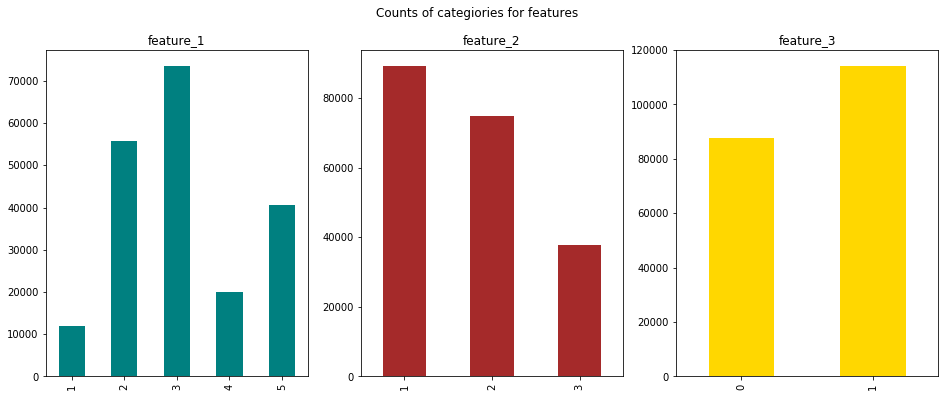

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
elo['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
elo['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
elo['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('Counts of categiories for features');

<Figure size 432x288 with 0 Axes>

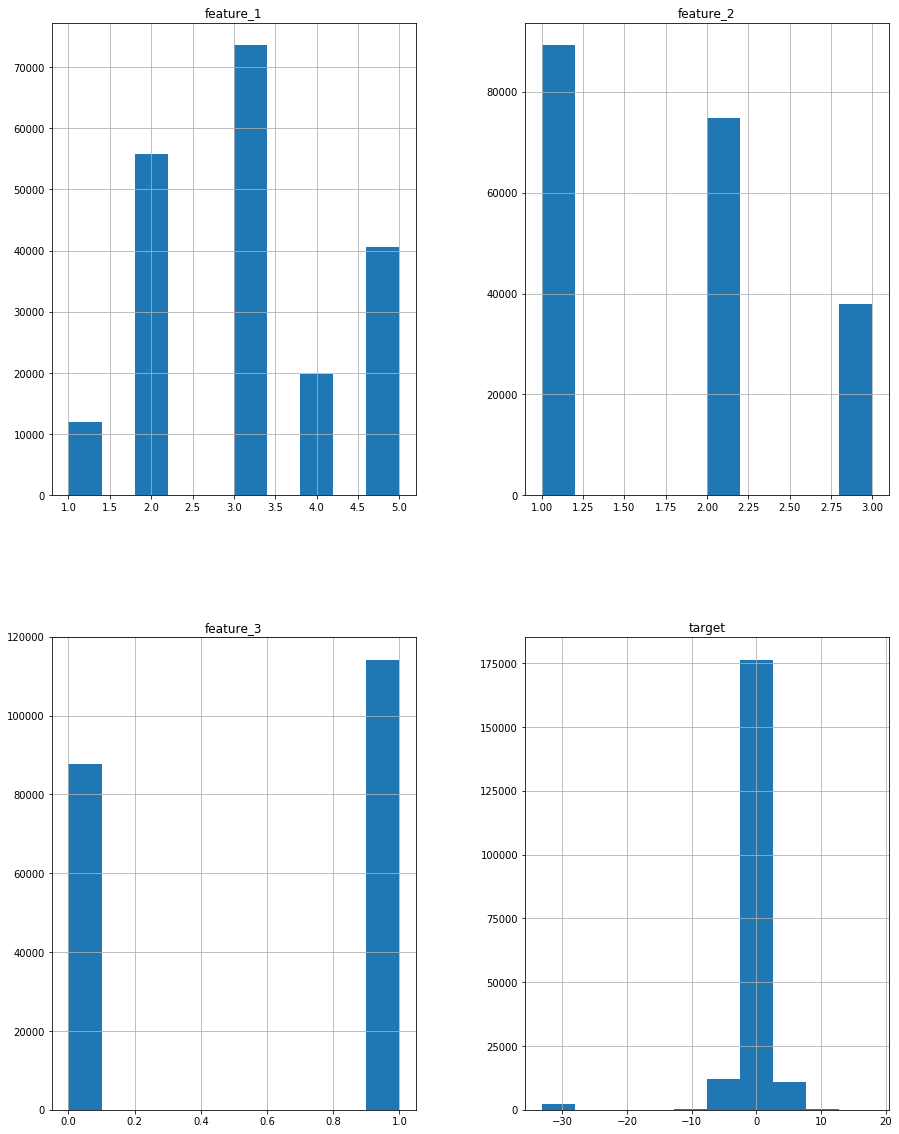

<Figure size 432x288 with 0 Axes>

In [7]:
# histograms
#if all the fields are numerical - the below code will build
#all possible histograms
elo.hist(figsize=(15,20))
plt.figure()

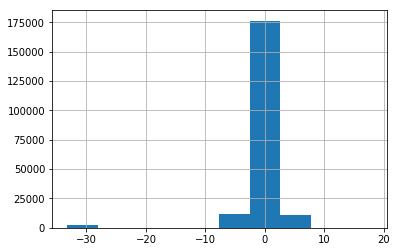

In [8]:
elo["target"].hist();

<Figure size 432x288 with 0 Axes>

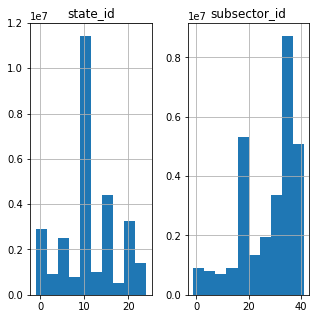

<Figure size 432x288 with 0 Axes>

In [9]:
data = elo_hist_trans[['state_id', 'subsector_id']]
data.hist(figsize=(5,5))
plt.figure()


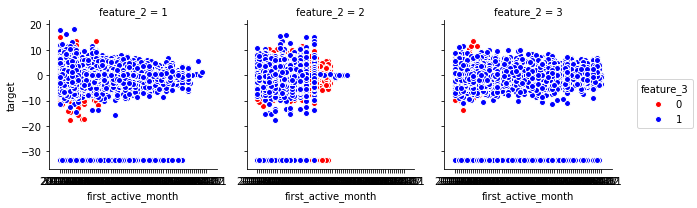

In [10]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(elo, hue="feature_3", col="feature_2", margin_titles=True,
                  palette={1:"blue", 0:"red"} )
g=g.map(plt.scatter, "first_active_month", "target",edgecolor="w").add_legend();

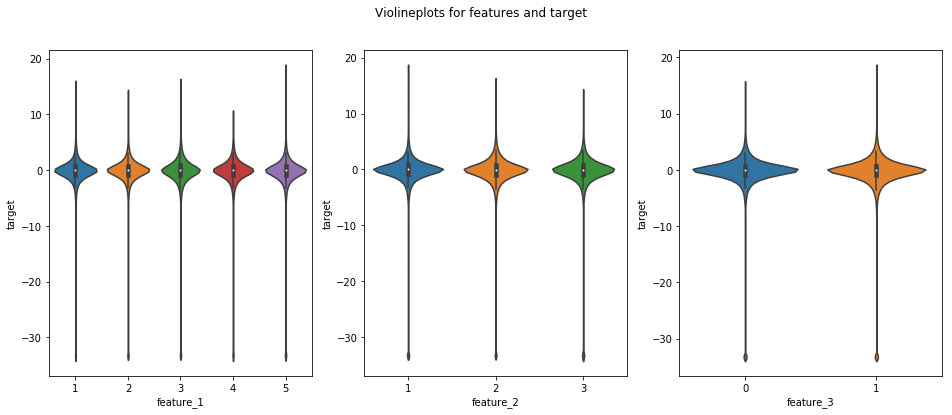

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Violineplots for features and target');
sns.violinplot(x="feature_1", y="target", data=elo, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="target", data=elo, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="target", data=elo, ax=ax[2], title='feature_3');

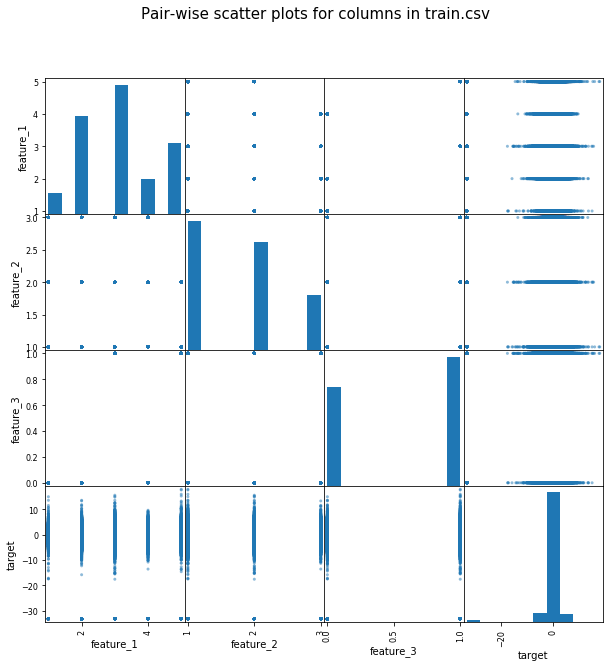

In [12]:
#pairwise scatter plots 
from pandas.plotting import scatter_matrix
select_cols = ['feature_1', 'feature_2', 'feature_3', 'target']
scatter_matrix(elo[select_cols], figsize=[10,10])
plt.suptitle('Pair-wise scatter plots for columns in train.csv', fontsize=15)
plt.show()

<Figure size 432x288 with 0 Axes>

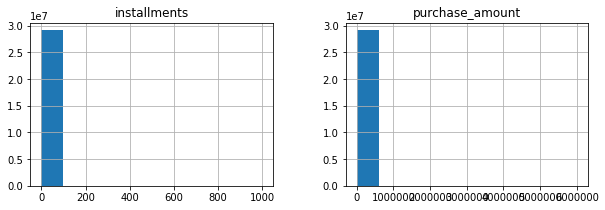

<Figure size 432x288 with 0 Axes>

In [13]:
# histograms
#if all the fields are numerical - the below code will build
#all possible histograms
data = elo_hist_trans[['purchase_amount', 'installments']]
data.hist(figsize=(10,3))
plt.figure()

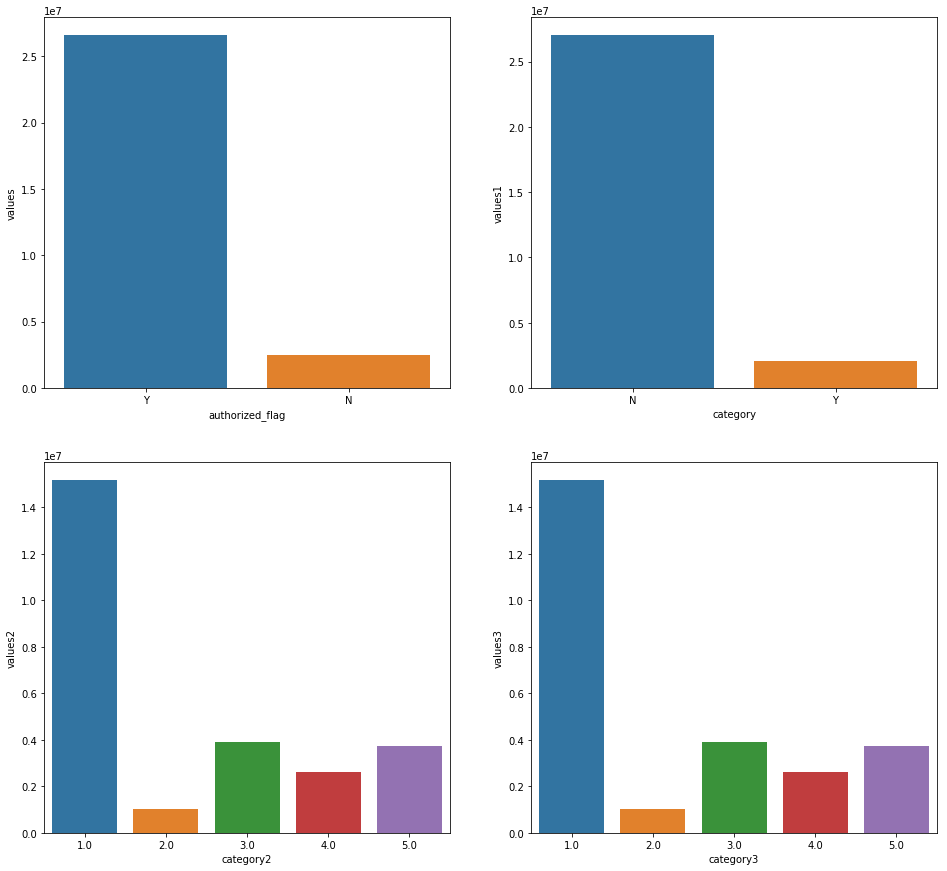

In [14]:
temp = elo_hist_trans["authorized_flag"].value_counts()
temp1 = elo_hist_trans["category_1"].value_counts()
temp2 = elo_hist_trans["category_2"].value_counts()
temp3 = elo_hist_trans["category_3"].value_counts()
df = pd.DataFrame({'authorized_flag': temp.index,
                   'values': temp.values
                  })
df1 = pd.DataFrame({'category': temp1.index,
                   'values1': temp1.values
                  })
df2 = pd.DataFrame({'category2': temp2.index,
                   'values2': temp2.values
                  })
df3 = pd.DataFrame({'category3': temp2.index,
                   'values3': temp2.values
                  })

fig, ax = plt.subplots(2, 2, figsize = (16, 15))
#plt.figure(figsize = (6,6))
#plt.title('authorized_flag - Y or N')
#sns.set_color_codes("pastel")
sns.barplot(x = 'authorized_flag', y="values", data=df, ax=ax[0][0])
sns.barplot(x = 'category', y="values1", data=df1, ax=ax[0][1])
sns.barplot(x = 'category2', y="values2", data=df2, ax=ax[1][0])
sns.barplot(x = 'category3', y="values3", data=df3, ax=ax[1][1])
locs, labels = plt.xticks()
plt.show()

In [ ]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(elo_hist_trans['merchant_id'])

In [ ]:
temp = elo_merchant["category_1"].value_counts()
temp1 = elo_merchant["category_4"].value_counts()
temp2 = elo_merchant["most_recent_sales_range"].value_counts()
temp3 = elo_merchant["most_recent_purchases_range"].value_counts()
temp4 = elo_merchant["category_2"].value_counts()

df = pd.DataFrame({'category_1': temp.index,
                   'values': temp.values
                  })
df1 = pd.DataFrame({'category_4': temp1.index,
                   'values1': temp1.values
                  })
df2 = pd.DataFrame({'most_recent_sales_range': temp2.index,
                   'values2': temp2.values
                  })
df3 = pd.DataFrame({'most_recent_purchases_range': temp2.index,
                   'values3': temp2.values
                  })
df4 = pd.DataFrame({'category_2': temp2.index,
                   'values4': temp2.values
                  })

fig, ax = plt.subplots(3, 2, figsize = (16, 15))
#plt.figure(figsize = (6,6))
#plt.title('authorized_flag - Y or N')
#sns.set_color_codes("pastel")
sns.barplot(x = 'category_1', y="values", data=df, ax=ax[0][0])
sns.barplot(x = 'category_4', y="values1", data=df1, ax=ax[0][1])
sns.barplot(x = 'most_recent_sales_range', y="values2", data=df2, ax=ax[1][0])
sns.barplot(x = 'most_recent_purchases_range', y="values3", data=df3, ax=ax[1][1])
sns.barplot(x = 'category_2', y="values4", data=df4, ax=ax[2][0])
locs, labels = plt.xticks()
plt.show()

As many of the columns in "elo_merchant" dataset have outliers and also to reduce the overall range of the dataset , we look at range of all the values in the column and then remove all the excess values from the column so to squeeze the data into usable dataset (this is done by subsetting data in a column based on a column value)

In [17]:
 elo_merchant_clean = elo_merchant.loc[(elo_merchant['numerical_1'] < 0.1) &
                               (elo_merchant['numerical_2'] < 0.1) &
                               (elo_merchant['avg_sales_lag3'] < 5) &
                               (elo_merchant['avg_purchases_lag3'] < 5) &
                               (elo_merchant['avg_sales_lag6'] < 10) &
                               (elo_merchant['avg_purchases_lag6'] < 10) &
                               (elo_merchant['avg_sales_lag12'] < 10) &
                               (elo_merchant['avg_purchases_lag12'] < 10)]

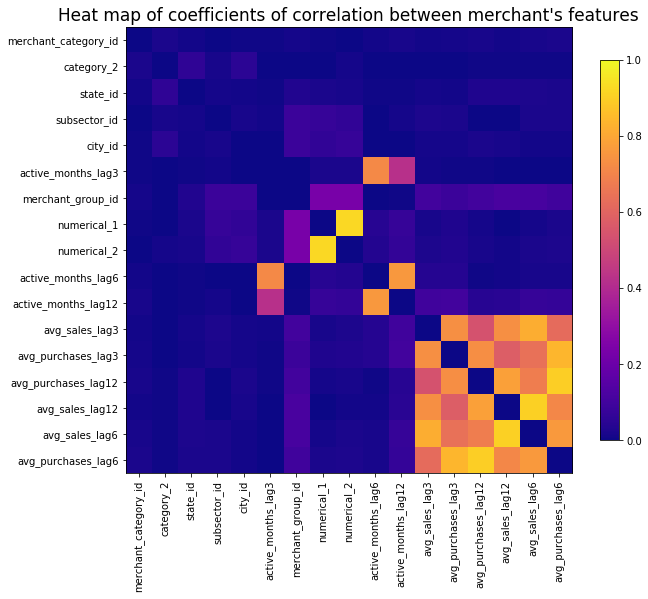

In [18]:
corrs = np.abs(elo_merchant_clean.corr())
ordered_cols = (corrs).sum().sort_values().index
np.fill_diagonal(corrs.values, 0)
plt.figure(figsize=[10,10])
plt.imshow(corrs.loc[ordered_cols, ordered_cols], cmap='plasma', vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(corrs.shape[0]), list(ordered_cols), rotation=90)
plt.yticks(range(corrs.shape[0]), list(ordered_cols))
plt.title('Heat map of coefficients of correlation between merchant\'s features', fontsize=17)
plt.show()

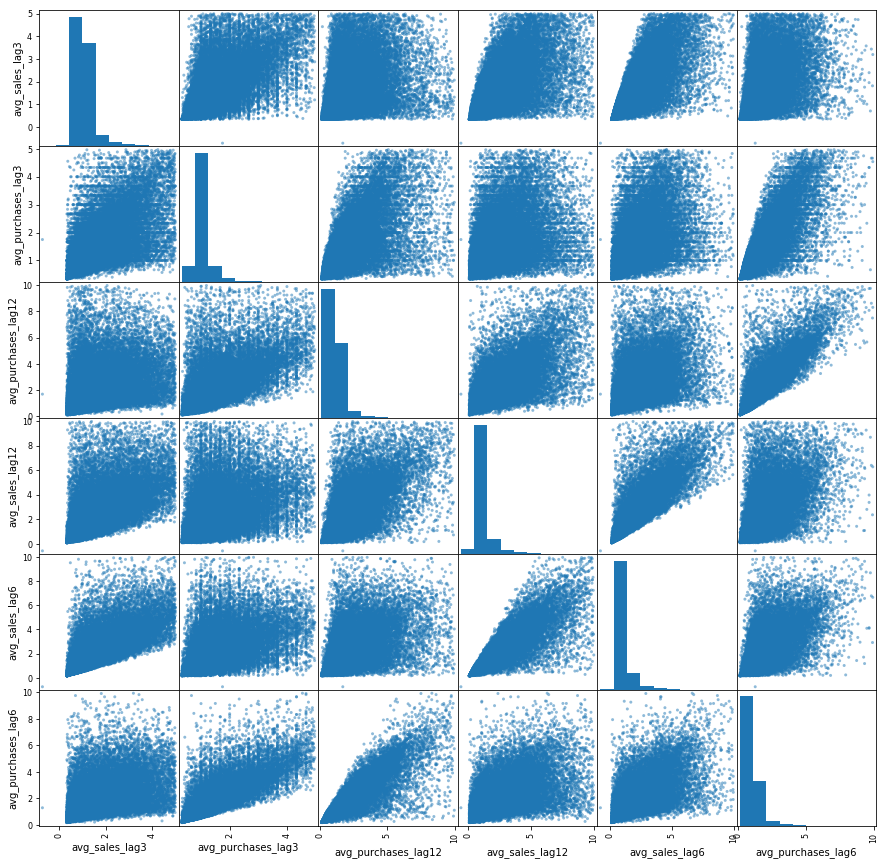

In [19]:
scatter_matrix(elo_merchant_clean[ordered_cols[-6:]], figsize=[15,15])
plt.show()

In [20]:
 elo_hist_trans_clean = elo_hist_trans.loc[(elo_hist_trans['installments'] < 8) &
                               (elo_hist_trans['purchase_amount'] < -0.67)]

In [21]:
 elo_hist_trans_clean

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37
10,Y,C_ID_4e6213e9bc,88,N,0,A,683,M_ID_1449f22bfb,-9,-0.734135,2017-05-09 12:42:07,1.0,16,34


In [22]:
n = 5
elo_hist_trans["purchase_amount"].value_counts().sort_values(ascending =False)

-0.671775     687283
-0.716855     600414
-0.701828     510925
-0.731881     417335
-0.596643     389066
-0.724368     356583
-0.686802     251586
-0.728876     218951
-0.709342     215933
-0.739395     196983
-0.656749     182084
-0.734887     174842
-0.737892     164423
-0.694315     148144
-0.641722     143909
-0.740897     141926
-0.736389     138907
-0.725871     137764
-0.733384     132061
-0.719860     128564
-0.727373     128056
-0.722865     125428
-0.626696     119750
-0.710844     108140
-0.521510     103256
-0.742400     102133
-0.745405     101966
-0.713849      99811
-0.730379      99580
-0.721363      97675
               ...  
 4.607384          1
 1.635591          1
 0.676148          1
 0.517438          1
 3.905616          1
 4.637677          1
 4.617677          1
 2.568527          1
 3.022628          1
 3.723990          1
 2.753683          1
 2.314774          1
 11.573750         1
 9.107479          1
 2.375015          1
 5.529952          1
 1.282558    

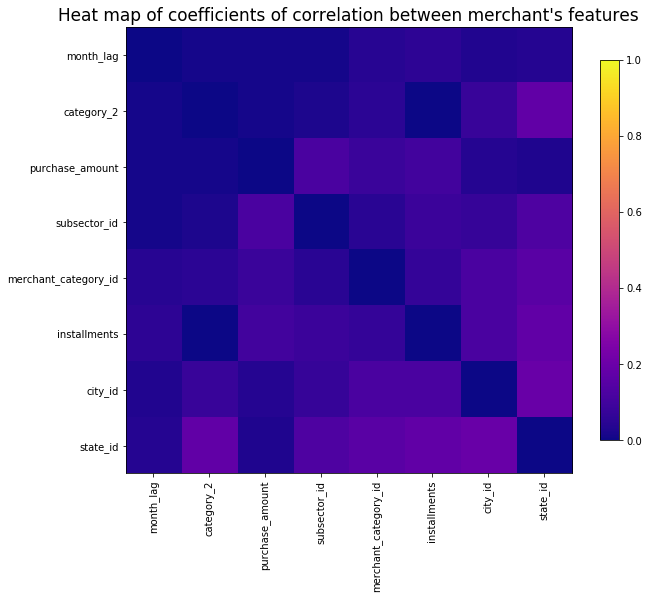

In [23]:
#run this at night 

corrs = np.abs(elo_hist_trans_clean.corr())
ordered_cols = (corrs).sum().sort_values().index
np.fill_diagonal(corrs.values, 0)
plt.figure(figsize=[10,10])
plt.imshow(corrs.loc[ordered_cols, ordered_cols], cmap='plasma', vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(corrs.shape[0]), list(ordered_cols), rotation=90)
plt.yticks(range(corrs.shape[0]), list(ordered_cols))
plt.title('Heat map of coefficients of correlation between merchant\'s features', fontsize=17)
plt.show()

###### Comparing dataset columns from "elo_hist_trans" and "elo_new_merchant"

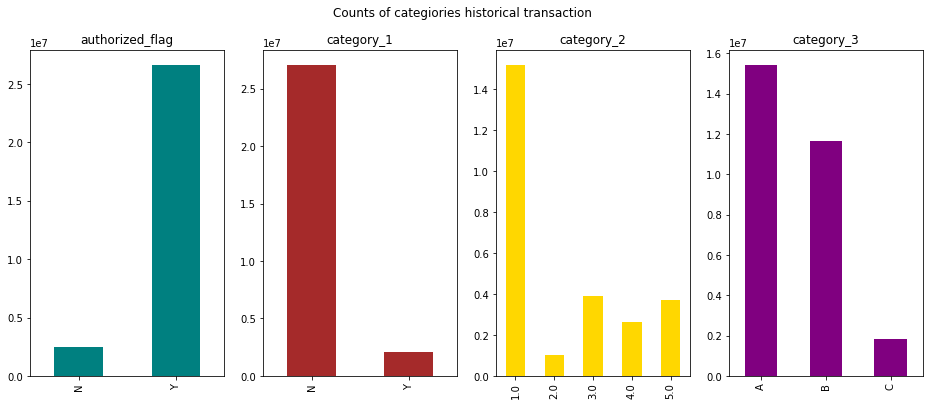

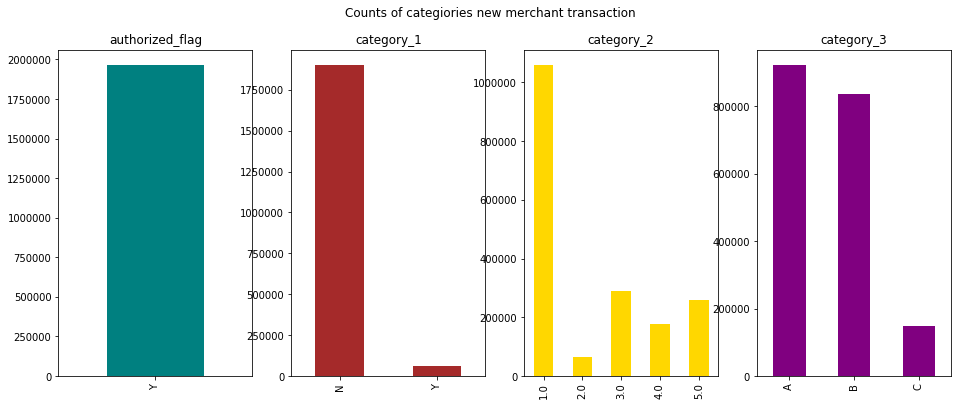

In [24]:
fig, ax = plt.subplots(1, 4, figsize = (16, 6));
elo_hist_trans['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='authorized_flag');
elo_hist_trans['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_1');
elo_hist_trans['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_2');
elo_hist_trans['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[3], color='purple', title='category_3');
plt.suptitle('Counts of categiories historical transaction');
fig, ax = plt.subplots(1, 4, figsize = (16, 6));
elo_new_merchant['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='authorized_flag');
elo_new_merchant['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_1');
elo_new_merchant['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_2');
elo_new_merchant['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[3], color='purple', title='category_3');
plt.suptitle('Counts of categiories new merchant transaction');

COMPARISON CONTINUED between two datasets 

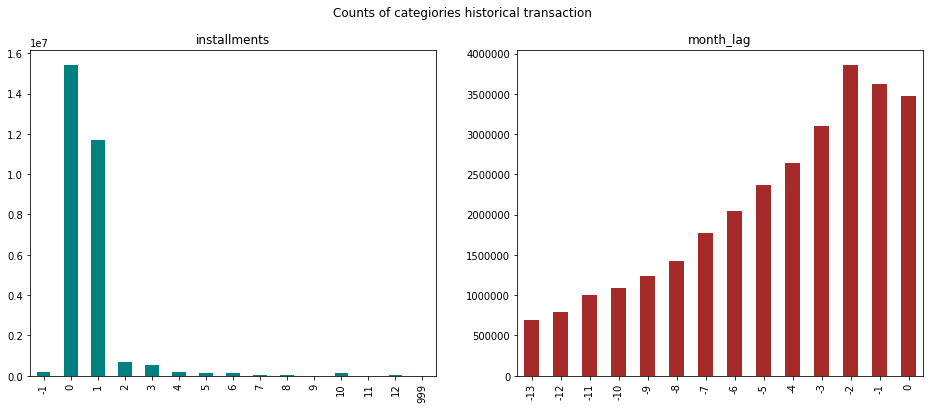

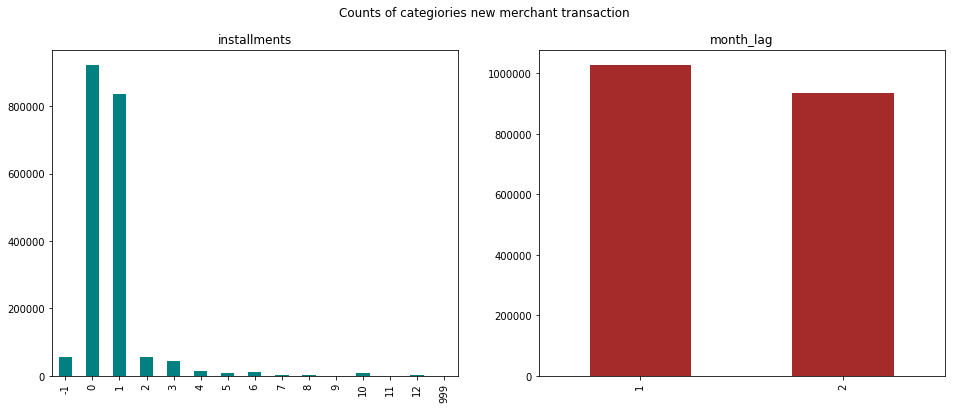

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6));
elo_hist_trans['installments'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='installments');
elo_hist_trans['month_lag'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='month_lag');
plt.suptitle('Counts of categiories historical transaction');

fig, ax = plt.subplots(1, 2, figsize = (16, 6));
elo_new_merchant['installments'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='installments');
elo_new_merchant['month_lag'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='month_lag');
plt.suptitle('Counts of categiories new merchant transaction');

C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


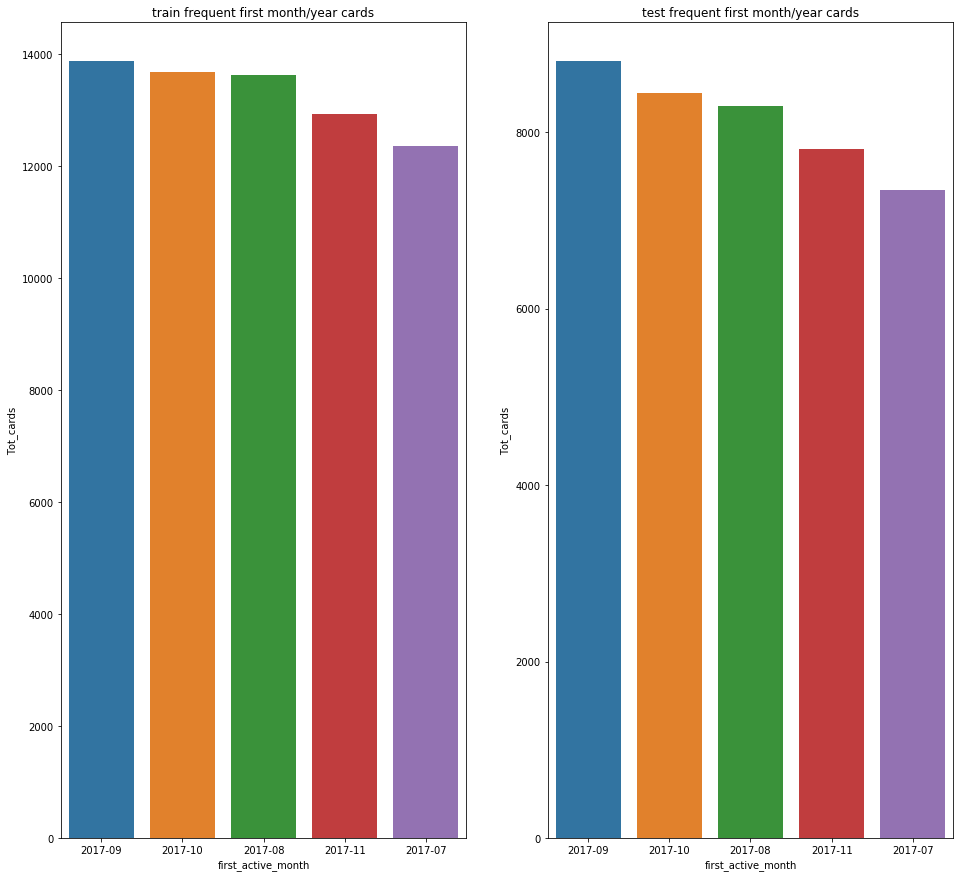

In [26]:


grouped_elo = elo.groupby("first_active_month")["card_id"].aggregate({'Tot_cards': 'count'}).reset_index()
grouped_elo = grouped_elo.sort_values(by='Tot_cards', ascending=False).head(5)

grouped_elo_test = elo1.groupby("first_active_month")["card_id"].aggregate({'Tot_cards': 'count'}).reset_index()
grouped_elo_test = grouped_elo_test.sort_values(by='Tot_cards', ascending=False).head(5)
fig, ax = plt.subplots(1, 2, figsize = (16, 15))
sns.barplot(grouped_elo.first_active_month, grouped_elo.Tot_cards, data=grouped_elo, ax=ax[0]).set_title('train frequent first month/year cards')
sns.barplot(grouped_elo_test.first_active_month, grouped_elo_test.Tot_cards, data=grouped_elo_test, ax=ax[1]).set_title('test frequent first month/year cards')
locs, labels = plt.xticks()
plt.show()

###### Looking at the Graph above - it seems like a lot of cards are active with highest peak seen at the month of September 2017 

In [27]:
elo['month'] = elo.first_active_month.str[5:7]

C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


Text(0.5,1,'test frequent first month cards')

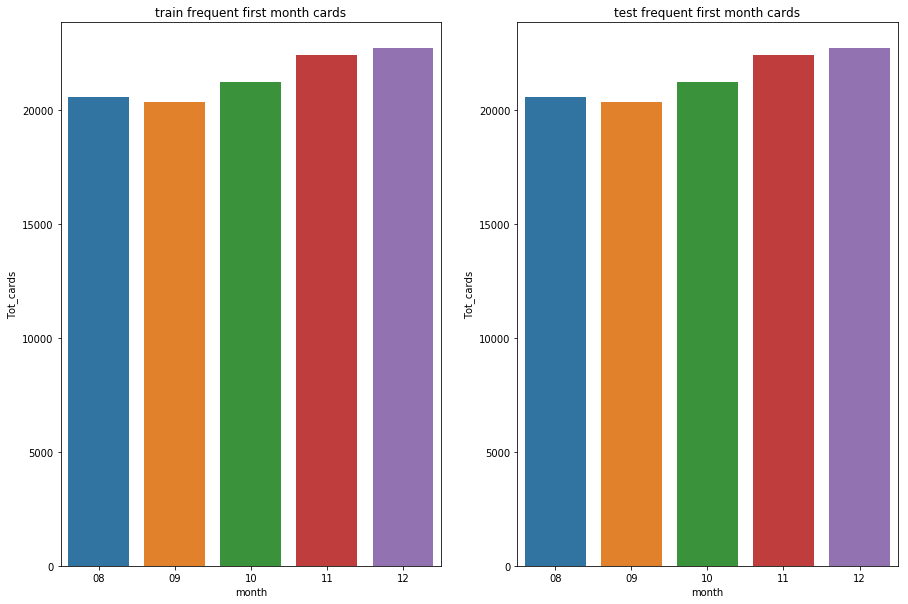

In [28]:
grouped_elo = elo.groupby("month")["card_id"].aggregate({'Tot_cards': 'count'}).reset_index()
grouped_elo = grouped_elo.sort_values(by='Tot_cards', ascending=False).head(5)

grouped_elo_test = elo.groupby("month")["card_id"].aggregate({'Tot_cards': 'count'}).reset_index()
grouped_elo_test = grouped_elo_test.sort_values(by='Tot_cards', ascending=False).head(5)

fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.barplot(grouped_elo.month, grouped_elo.Tot_cards, data=grouped_elo, ax=ax[0]).set_title('train frequent first month cards')
sns.barplot(grouped_elo_test.month, grouped_elo_test.Tot_cards, data=grouped_elo_test, ax=ax[1]).set_title('test frequent first month cards')

###### Also the Month of December seems to be the starting month for many card holders - for both test and training data sets. 

In [31]:

#elo_new_merchant['pmonth'] = elo_new_merchant.purchase_date.str[5:7]
#elo_new_merchant['pyear'] = elo_new_merchant.purchase_date.str[0:4]


In [ ]:
grouped_elo_new_merchant = elo_new_merchant.groupby("pmonth")["card_id"].aggregate({'Tot_cards': 'count'}).reset_index()
grouped_elo_new_merchant = grouped_elo_new_merchant.sort_values(by='Tot_cards', ascending=False).head(5)

grouped_elo_new_merchant1 = elo_new_merchant.groupby("pmonth")["purchase_amount"].aggregate({'pur_amt': 'sum'}).reset_index()
grouped_elo_new_merchant1 = grouped_elo_new_merchant1.sort_values(by='pur_amt', ascending=False).head(5)

fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.barplot(grouped_elo_new_merchant.pmonth, grouped_elo_new_merchant.Tot_cards, data=grouped_elo_new_merchant, ax=ax[0]).set_title('Months by count of cards signed up')
sns.barplot(grouped_elo_new_merchant1.pmonth, grouped_elo_new_merchant1.pur_amt, data=grouped_elo_new_merchant1, ax=ax[1]).set_title('Months by sum of purchase amount in total')

###### Same exercise as above carried out in the next step for historical transactions

In [32]:
elo_hist_trans['pmonth'] = elo_hist_trans.purchase_date.str[5:7]
elo_hist_trans['pyear'] = elo_hist_trans.purchase_date.str[0:4]

C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


Text(0.5,1,'Months by sum of purchase amount in total')

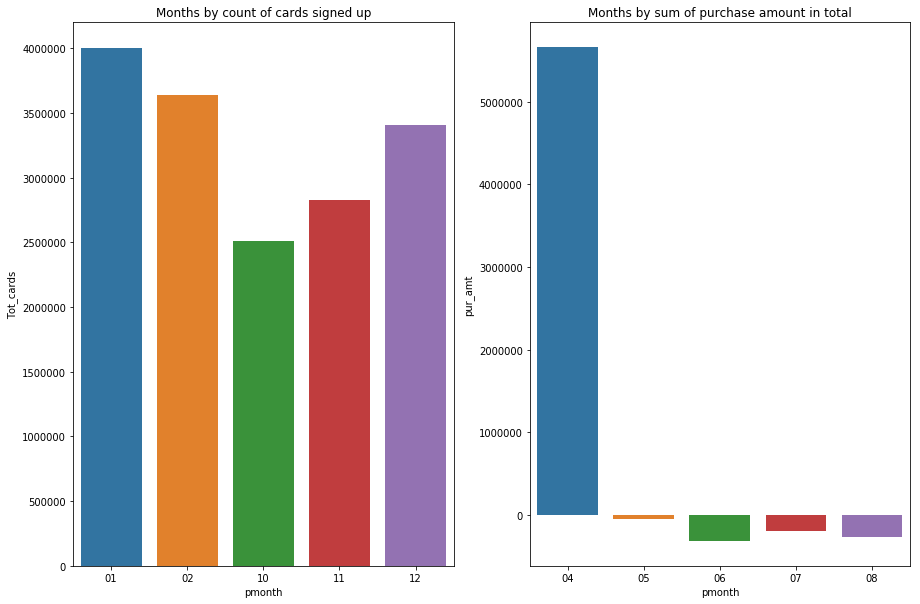

In [33]:
grouped_elo_hist_trans = elo_hist_trans.groupby("pmonth")["card_id"].aggregate({'Tot_cards': 'count'}).reset_index()
grouped_elo_hist_trans = grouped_elo_hist_trans.sort_values(by='Tot_cards', ascending=False).head(5)

grouped_elo_hist_trans1 = elo_hist_trans.groupby("pmonth")["purchase_amount"].aggregate({'pur_amt': 'sum'}).reset_index()
grouped_elo_hist_trans1 = grouped_elo_hist_trans1.sort_values(by='pur_amt', ascending=False).head(5)

fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.barplot(grouped_elo_hist_trans.pmonth, grouped_elo_hist_trans.Tot_cards, data=grouped_elo_hist_trans, ax=ax[0]).set_title('Months by count of cards signed up')
sns.barplot(grouped_elo_hist_trans1.pmonth, grouped_elo_hist_trans1.pur_amt, data=grouped_elo_hist_trans1, ax=ax[1]).set_title('Months by sum of purchase amount in total')

###### The numbers above in historical transactions look drastically different than that of purchase amount and number of
cards from new merchant transactions

###### NOW LETS MOVE ON TO FEATURE ENGINEERING - CREATING NEW VARIABLES IN DATASET 

In [ ]:
elo_hist_trans_new = elo_hist_trans.groupby("card_id")[category_1 != 1].aggregate({'cat1_count': 'mean'}).reset_index()
elo_hist_trans_new_2 = elo_hist_trans.groupby("card_id")["category_2"].aggregate({'cat2_count': 'mean'}).reset_index()
elo_hist_trans_new2 = pd.merge(left=elo_hist_trans_new_2, right=elo_hist_trans_new, how='inner', on=['card_id'])
elo_hist_trans_new_3 = elo_hist_trans.groupby("card_id")["category_3"].aggregate({'cat3_count': 'count'}).reset_index()
elo_hist_trans_new3 = pd.merge(left=elo_hist_trans_new2, right=elo_hist_trans_new_3, how='inner', on=['card_id'])
elo_hist_trans_new_4 = elo_hist_trans.groupby("card_id")["purchase_amount"].aggregate({'purchase_amt': 'sum'}).reset_index()
elo_hist_trans_new4 = pd.merge(left=elo_hist_trans_new3, right=elo_hist_trans_new_4, how='inner', on=['card_id'])
elo_hist_trans_new_5 = elo_hist_trans.groupby("card_id")["card_id"].aggregate({'num_of_transaction': 'count'}).reset_index()
elo_hist_trans_new5 = pd.merge(left=elo_hist_trans_new4, right=elo_hist_trans_new_5, how='inner', on=['card_id'])

elo_hist_trans_newest = pd.merge(left=elo, right=elo_hist_trans_new5, how='inner', on=['card_id'])

In [35]:
elo_hist_trans_newest.head(5)

NameError: name 'elo_hist_trans_newest' is not defined

In [36]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [37]:
elo_hist_trans['purchase_date'] = pd.to_datetime(elo_hist_trans['purchase_date'])
elo_new_merchant['purchase_date'] = pd.to_datetime(elo_new_merchant['purchase_date'])
historical_transactions = pd.get_dummies(elo_hist_trans, columns=['category_2', 'category_3'])
new_transactions = pd.get_dummies(elo_new_merchant, columns=['category_2', 'category_3'])

historical_transactions = reduce_mem_usage(historical_transactions)
new_transactions = reduce_mem_usage(new_transactions)


Mem. usage decreased to 2137.81 Mb (35.8% reduction)
Mem. usage decreased to 110.45 Mb (43.3% reduction)


In [38]:
new_transactions.dtypes

authorized_flag                 object
card_id                         object
city_id                          int16
category_1                      object
installments                     int16
merchant_category_id             int16
merchant_id                     object
month_lag                         int8
purchase_amount                float16
purchase_date           datetime64[ns]
state_id                          int8
subsector_id                      int8
category_2_1.0                   uint8
category_2_2.0                   uint8
category_2_3.0                   uint8
category_2_4.0                   uint8
category_2_5.0                   uint8
category_3_A                     uint8
category_3_B                     uint8
category_3_C                     uint8
dtype: object

In [39]:

historical_transactions['purchase_month'] = historical_transactions['purchase_date'].dt.month
new_transactions['purchase_month'] = new_transactions['purchase_date'].dt.month

In [40]:
historical_transactions.head(5)

,authorized_flag,card_id,city_id,category_1,installments,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,...,pyear,category_2_1.0,category_2_2.0,category_2_3.0,category_2_4.0,category_2_5.0,category_3_A,category_3_B,category_3_C,purchase_month
0,Y,C_ID_4e6213e9bc,88,N,0,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,...,2017,1,0,0,0,0,1,0,0,6
1,Y,C_ID_4e6213e9bc,88,N,0,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,...,2017,1,0,0,0,0,1,0,0,7
2,Y,C_ID_4e6213e9bc,88,N,0,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,...,2017,1,0,0,0,0,1,0,0,8
3,Y,C_ID_4e6213e9bc,88,N,0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,...,2017,1,0,0,0,0,1,0,0,9
4,Y,C_ID_4e6213e9bc,88,N,0,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,...,2017,1,0,0,0,0,1,0,0,3


In [41]:
def binarize(df):
    for col in ['authorized_flag', 'category_1']:
        df[col] = df[col].map({'Y':1, 'N':0})
    return df

historical_transactions = binarize(historical_transactions)
new_transactions = binarize(new_transactions)

In [42]:
def aggregate_transactions(history):
    
    agg_func = {
    'category_1': ['sum', 'mean'],
    'category_2_1.0': ['mean'],
    'category_2_2.0': ['mean'],
    'category_2_3.0': ['mean'],
    'category_2_4.0': ['mean'],
    'category_2_5.0': ['mean'],
    'category_3_A': ['mean'],
    'category_3_B': ['mean'],
    'category_3_C': ['mean'],
    'merchant_id': ['nunique'],
    'merchant_category_id': ['nunique'],
    'state_id': ['nunique'],
    'city_id': ['nunique'],
    'subsector_id': ['nunique'],
    'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
    'installments': ['sum', 'mean', 'max', 'min', 'std'],
    'purchase_month': ['mean', 'max', 'min', 'std'],
    'purchase_date': [np.ptp, 'min', 'max'],
    'month_lag': ['mean', 'max', 'min', 'std']
    }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['_'.join(col).strip() for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history


In [43]:
history = aggregate_transactions(historical_transactions)
history.head(5)

C:\Users\ashar21\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1351: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.var(ddof=ddof, **kwargs))


,card_id,transactions_count,category_1_sum,category_1_mean,category_2_1.0_mean,category_2_2.0_mean,category_2_3.0_mean,category_2_4.0_mean,category_2_5.0_mean,category_3_A_mean,...,purchase_month_max,purchase_month_min,purchase_month_std,purchase_date_ptp,purchase_date_min,purchase_date_max,month_lag_mean,month_lag_max,month_lag_min,month_lag_std
0,C_ID_00007093c1,149,28,0.187919,0.000000,0.000000,0.805369,0.0,0.006711,0.000000,...,12,1,3.303308,377 days 15:14:14,2017-02-14 14:00:43,2018-02-27 05:14:57,-5.852349,0,-12,3.453114
1,C_ID_0001238066,123,2,0.016260,0.772358,0.000000,0.000000,0.0,0.162602,0.000000,...,12,1,4.895850,151 days 17:53:45,2017-09-28 22:25:14,2018-02-27 16:18:59,-1.813008,0,-5,1.288980
2,C_ID_0001506ef0,66,0,0.000000,0.030303,0.000000,0.969697,0.0,0.000000,0.984848,...,12,1,4.524190,398 days 20:17:55,2017-01-14 16:16:01,2018-02-17 12:33:56,-4.833333,0,-13,4.237500
3,C_ID_0001793786,216,2,0.009259,0.050926,0.351852,0.069444,0.0,0.000000,0.976852,...,10,1,2.306373,283 days 10:04:57,2017-01-21 10:15:21,2017-10-31 20:20:18,-3.328704,0,-9,2.306373
4,C_ID_000183fdda,144,4,0.027778,0.048611,0.006944,0.909722,0.0,0.006944,0.000000,...,12,1,4.439959,202 days 11:07:54,2017-08-07 09:49:14,2018-02-25 20:57:08,-2.451389,0,-6,1.895264


In [44]:
len(history.columns)

38

In [45]:
new = aggregate_transactions(new_transactions) 
new.head(5)

,card_id,transactions_count,category_1_sum,category_1_mean,category_2_1.0_mean,category_2_2.0_mean,category_2_3.0_mean,category_2_4.0_mean,category_2_5.0_mean,category_3_A_mean,...,purchase_month_max,purchase_month_min,purchase_month_std,purchase_date_ptp,purchase_date_min,purchase_date_max,month_lag_mean,month_lag_max,month_lag_min,month_lag_std
0,C_ID_00007093c1,2,0,0.000000,0.500000,0.000000,0.50000,0.0,0.000000,0.0,...,4,4,0.000000,6 days 05:10:24,2018-04-03 11:13:35,2018-04-09 16:23:59,2.000000,2,2,0.000000
1,C_ID_0001238066,26,2,0.076923,0.769231,0.000000,0.00000,0.0,0.115385,0.0,...,4,3,0.485165,60 days 03:09:03,2018-03-01 16:48:27,2018-04-30 19:57:30,1.346154,2,1,0.485165
2,C_ID_0001506ef0,2,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,1.0,...,3,3,0.000000,5 days 10:52:32,2018-03-16 22:21:58,2018-03-22 09:14:30,1.000000,1,1,0.000000
3,C_ID_0001793786,31,0,0.000000,0.483871,0.258065,0.16129,0.0,0.032258,1.0,...,12,11,0.475191,46 days 01:51:36,2017-11-15 15:44:20,2017-12-31 17:35:56,1.322581,2,1,0.475191
4,C_ID_000183fdda,11,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.0,...,4,3,0.467099,59 days 02:33:27,2018-03-02 12:26:26,2018-04-30 14:59:53,1.272727,2,1,0.467099


In [46]:
new.columns = ['new_' + c if c != 'card_id' else c for c in new.columns]
new[:5]

,card_id,new_transactions_count,new_category_1_sum,new_category_1_mean,new_category_2_1.0_mean,new_category_2_2.0_mean,new_category_2_3.0_mean,new_category_2_4.0_mean,new_category_2_5.0_mean,new_category_3_A_mean,...,new_purchase_month_max,new_purchase_month_min,new_purchase_month_std,new_purchase_date_ptp,new_purchase_date_min,new_purchase_date_max,new_month_lag_mean,new_month_lag_max,new_month_lag_min,new_month_lag_std
0,C_ID_00007093c1,2,0,0.000000,0.500000,0.000000,0.50000,0.0,0.000000,0.0,...,4,4,0.000000,6 days 05:10:24,2018-04-03 11:13:35,2018-04-09 16:23:59,2.000000,2,2,0.000000
1,C_ID_0001238066,26,2,0.076923,0.769231,0.000000,0.00000,0.0,0.115385,0.0,...,4,3,0.485165,60 days 03:09:03,2018-03-01 16:48:27,2018-04-30 19:57:30,1.346154,2,1,0.485165
2,C_ID_0001506ef0,2,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,1.0,...,3,3,0.000000,5 days 10:52:32,2018-03-16 22:21:58,2018-03-22 09:14:30,1.000000,1,1,0.000000
3,C_ID_0001793786,31,0,0.000000,0.483871,0.258065,0.16129,0.0,0.032258,1.0,...,12,11,0.475191,46 days 01:51:36,2017-11-15 15:44:20,2017-12-31 17:35:56,1.322581,2,1,0.475191
4,C_ID_000183fdda,11,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.0,...,4,3,0.467099,59 days 02:33:27,2018-03-02 12:26:26,2018-04-30 14:59:53,1.272727,2,1,0.467099


In [47]:
old_new_transaction = pd.merge(left=new, right=history, how='inner', on=['card_id'])
old_new_transaction.head(5)

,card_id,new_transactions_count,new_category_1_sum,new_category_1_mean,new_category_2_1.0_mean,new_category_2_2.0_mean,new_category_2_3.0_mean,new_category_2_4.0_mean,new_category_2_5.0_mean,new_category_3_A_mean,...,purchase_month_max,purchase_month_min,purchase_month_std,purchase_date_ptp,purchase_date_min,purchase_date_max,month_lag_mean,month_lag_max,month_lag_min,month_lag_std
0,C_ID_00007093c1,2,0,0.000000,0.500000,0.000000,0.50000,0.0,0.000000,0.0,...,12,1,3.303308,377 days 15:14:14,2017-02-14 14:00:43,2018-02-27 05:14:57,-5.852349,0,-12,3.453114
1,C_ID_0001238066,26,2,0.076923,0.769231,0.000000,0.00000,0.0,0.115385,0.0,...,12,1,4.895850,151 days 17:53:45,2017-09-28 22:25:14,2018-02-27 16:18:59,-1.813008,0,-5,1.288980
2,C_ID_0001506ef0,2,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,1.0,...,12,1,4.524190,398 days 20:17:55,2017-01-14 16:16:01,2018-02-17 12:33:56,-4.833333,0,-13,4.237500
3,C_ID_0001793786,31,0,0.000000,0.483871,0.258065,0.16129,0.0,0.032258,1.0,...,10,1,2.306373,283 days 10:04:57,2017-01-21 10:15:21,2017-10-31 20:20:18,-3.328704,0,-9,2.306373
4,C_ID_000183fdda,11,0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.0,...,12,1,4.439959,202 days 11:07:54,2017-08-07 09:49:14,2018-02-25 20:57:08,-2.451389,0,-6,1.895264


###### COMBINE TRAIN/OLD_NEW_TRANSACTION and TEST/OLD_NEW_TRANSACTION TO GET final "TRAIN" and "TEST" datasets

In [48]:
train_final = pd.merge(elo, old_new_transaction, on='card_id', how='left')
test_final = pd.merge(elo1, old_new_transaction, on='card_id', how='left')
train_final.fillna(0,inplace=True)
test_final.fillna(0,inplace=True)
train_final.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,month,new_transactions_count,new_category_1_sum,new_category_1_mean,...,purchase_month_max,purchase_month_min,purchase_month_std,purchase_date_ptp,purchase_date_min,purchase_date_max,month_lag_mean,month_lag_max,month_lag_min,month_lag_std
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,06,23.0,0.0,0.000000,...,12.0,1.0,3.474193,242 days 19:13:07,2017-06-27 14:18:08,2018-02-25 09:31:15,-3.911538,0.0,-8.0,2.397687
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,01,6.0,0.0,0.000000,...,12.0,1.0,3.848142,390 days 06:01:27,2017-01-06 16:29:42,2018-01-31 22:31:09,-5.031429,0.0,-12.0,3.804934
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,08,1.0,0.0,0.000000,...,12.0,1.0,3.275467,412 days 10:47:03,2017-01-11 08:21:22,2018-02-27 19:08:25,-8.604651,0.0,-13.0,3.842987
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,09,7.0,1.0,0.142857,...,12.0,1.0,3.904797,154 days 19:22:19,2017-09-26 16:22:21,2018-02-28 11:44:40,-2.831169,0.0,-5.0,1.802065
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,11,36.0,2.0,0.055556,...,12.0,1.0,5.003086,108 days 20:40:41,2017-11-12 00:00:00,2018-02-28 20:40:41,-1.285714,0.0,-3.0,1.026700


In [49]:
train_final.dtypes

first_active_month                           object
card_id                                      object
feature_1                                     int64
feature_2                                     int64
feature_3                                     int64
target                                      float64
month                                        object
new_transactions_count                      float64
new_category_1_sum                          float64
new_category_1_mean                         float64
new_category_2_1.0_mean                     float64
new_category_2_2.0_mean                     float64
new_category_2_3.0_mean                     float64
new_category_2_4.0_mean                     float64
new_category_2_5.0_mean                     float64
new_category_3_A_mean                       float64
new_category_3_B_mean                       float64
new_category_3_C_mean                       float64
new_merchant_id_nunique                     float64
new_merchant

In [50]:
X_train_final = train_final.drop(['card_id','first_active_month', 'purchase_date_ptp', 'target'], axis=1)
Y_train_final = train_final.drop(['target'], axis=1)